In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import yellowbrick
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [2]:
# https://sci2s.ugr.es/keel/dataset.php?cod=52
df = pd.read_csv('./datasets/abalone.csv')
df.shape

(4174, 9)

## Preprocessing
### create missing value data

In [3]:
# create NaN data
num_nan = 10
missing_x = np.random.randint(0, df.shape[0], (num_nan, 1))
missing_y = np.random.randint(0, df.shape[1], (num_nan, 1))

for i, j in zip(missing_x, missing_y):
    df.iloc[i, j] = np.nan

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [5]:
df.dtypes

Sex                 object
 Length            float64
 Diameter          float64
 Height            float64
 Whole_weight      float64
 Shucked_weight    float64
 Viscera_weight    float64
 Shell_weight      float64
 Class             float64
dtype: object

### Handling Missing Values

In [6]:
# extract NaN data
df[df.isnull().any(axis=1)]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
47,M,0.40,0.320,0.095,NaN,0.1335,0.0600,0.1000,7.0
329,F,0.66,0.565,0.195,1.7605,0.6920,0.3265,0.5000,NaN
1095,I,NaN,0.185,0.065,0.0685,0.0295,0.0140,0.0225,5.0
2194,M,0.54,0.415,0.170,0.8790,0.3390,0.2080,0.2550,NaN
2548,M,0.52,0.400,0.105,0.8720,NaN,0.1615,0.1985,9.0
2860,F,0.57,0.465,0.155,0.8720,0.3245,0.2390,NaN,14.0
2991,NaN,0.35,0.260,0.090,0.1950,0.0745,0.0410,0.0655,9.0
3317,M,0.62,NaN,0.180,1.3915,0.7260,0.2795,0.3320,11.0
3844,NaN,0.50,0.385,0.120,0.5600,0.2835,0.1030,0.1350,8.0
4035,F,NaN,0.565,0.170,1.6130,0.7230,0.3255,0.4945,12.0


In [7]:
# Delete or replace missing value
df.dropna(inplace=True) # delete
# df.fillna(df.mean()) # fill NaN
df.shape

(4164, 9)

### Encoding categorical values

In [8]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [9]:
# One-Hot encoding
X = pd.get_dummies(X)

In [10]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


## EDA

In [11]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
count,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,0.524059,0.407924,0.139537,0.828717,0.359317,0.180619,0.238853,0.313160,0.321566,0.365274
std,0.119987,0.099135,0.041816,0.489885,0.221694,0.109570,0.139091,0.463835,0.467133,0.481565
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.442375,0.186500,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501625,0.252625,0.328625,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


In [12]:
print(X.shape)

(4164, 10)


### Class ratio

In [13]:
from collections import Counter
print(Counter(y))

Counter({9.0: 687, 10.0: 633, 8.0: 566, 11.0: 486, 7.0: 389, 12.0: 265, 6.0: 259, 13.0: 203, 14.0: 125, 5.0: 114, 15.0: 103, 16.0: 66, 17.0: 58, 4.0: 57, 18.0: 42, 19.0: 32, 20.0: 26, 3.0: 15, 21.0: 14, 23.0: 9, 22.0: 6, 27.0: 2, 24.0: 2, 1.0: 1, 26.0: 1, 29.0: 1, 2.0: 1, 25.0: 1})


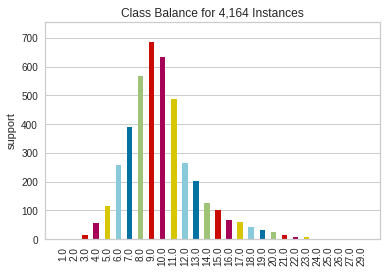

In [14]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

### Correlation

/home/yura/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


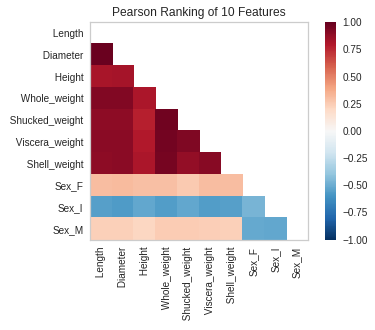

In [15]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=X.columns, algorithm='pearson')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Box plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

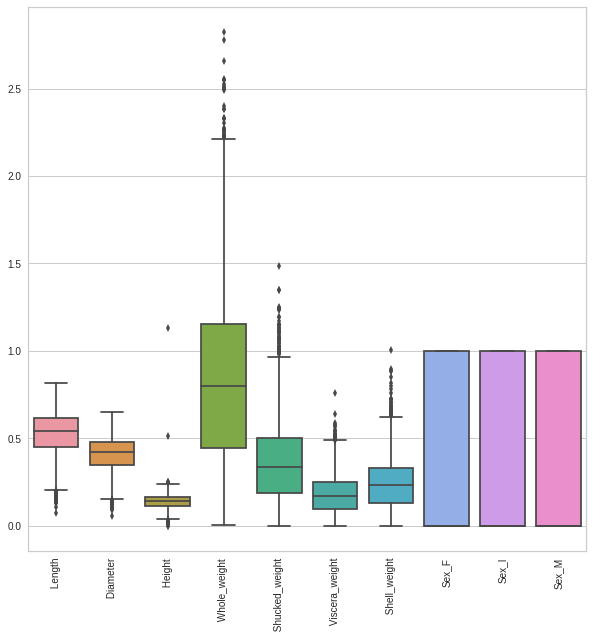

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)

In [17]:
# pandas_profiling
profile = pdp.ProfileReport(df)
profile.to_file(outputfile="output.html")
#profile

## Learning

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [19]:
X = np.array(X)
y = np.array(y)

# scaling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [21]:
# learning
kernel = ['linear', 'rbf', 'poly']
clf = []

for i in kernel:
    svm = SVC(C=1.0, gamma='auto', kernel=i, random_state=42)
    clf.append(svm.fit(X_train, y_train))

## Evaluate

In [22]:
from sklearn import metrics

In [23]:
def calc_metrics(y_test, y_pred):
    pre = metrics.precision_score(y_test, y_pred, average='micro')
    recall = metrics.recall_score(y_test, y_pred, average='micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [24]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(X_test)
    result.append(calc_metrics(y_test, y_pred))

In [25]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Kernel=kernel)
result_df = result_df[['Kernel', 'Precision', 'Recall', 'Acc', 'F-score']]
round(result_df, 3)

,Kernel,Precision,Recall,Acc,F-score
0,linear,0.269,0.269,0.269,0.269
1,rbf,0.271,0.271,0.271,0.271
2,poly,0.268,0.268,0.268,0.268


In [26]:
result_mlt = pd.melt(result_df, id_vars='Kernel', var_name='Metrics', value_name='values')
result_mlt

,Kernel,Metrics,values
0,linear,Precision,0.268908
1,rbf,Precision,0.270708
2,poly,Precision,0.267707
3,linear,Recall,0.268908
4,rbf,Recall,0.270708
5,poly,Recall,0.267707
6,linear,Acc,0.268908
7,rbf,Acc,0.270708
8,poly,Acc,0.267707
9,linear,F-score,0.268908


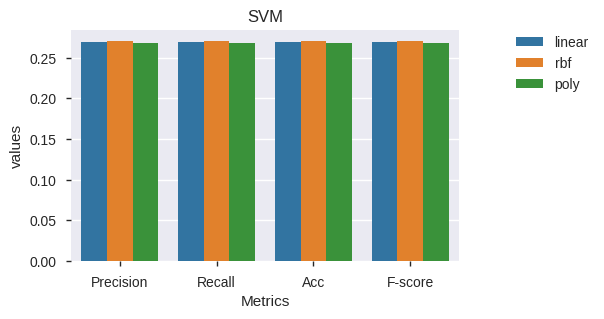

In [27]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Metrics', y='values', hue='Kernel', data=result_mlt)
plt.title('SVM')
plt.legend(loc='best', bbox_to_anchor=(1.35, 1), borderaxespad=0)

## Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
tuning_parm = [
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
]

clf = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [30]:
clf.fit(X_train, y_train)

/home/yura/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/yura/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [31]:
grid_df = pd.DataFrame.from_dict(clf.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.226717,0.025929,0.059627,0.012729,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.251953,0.234592,...,0.259408,0.022426,6,0.298590,0.300251,0.2785,0.297203,0.283225,0.291554,0.008909
1,0.193702,0.006588,0.061252,0.013890,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.220703,0.238569,...,0.244596,0.021485,10,0.257805,0.256642,0.2585,0.256743,0.252364,0.256411,0.002138
2,0.202411,0.003560,0.053600,0.003168,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.208984,0.262425,...,0.232186,0.030293,13,0.243202,0.225564,0.2405,0.237762,0.222997,0.234005,0.008165
3,0.217851,0.002276,0.052454,0.002151,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.242188,0.230616,...,0.265813,0.024810,2,0.357503,0.353383,0.3495,0.349650,0.338477,0.349703,0.006332
4,0.194877,0.004964,0.052417,0.002156,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.238281,0.232604,...,0.258607,0.029337,7,0.285498,0.291228,0.2820,0.282717,0.264808,0.281250,0.008839


In [32]:
col = ['mean_train_score', 'params']
grid_df = grid_df[col]
grid_df.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
6,0.446471,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
15,0.408648,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
3,0.349703,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
12,0.333679,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
7,0.311560,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
0,0.291554,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.285445,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}"
4,0.281250,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
8,0.279248,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}"
1,0.256411,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}"
